# <span style='color:blue'> PYTORCH TUTORIAL </span>
# <span style='color:blue'> by Jimin Kim </span>

# <span style='color:red'> Part 1: Python as Deep Learning Platform -----------------------------------------------------</span>

### 1.1 - Verify PyTorch Installation

In [1]:
# Import necessary packages

import numpy as np
import torch

In [2]:
# Define a random torch tensor of shape (5, 3)

x = torch.rand(5, 3)
print(x)

tensor([[0.5007, 0.5501, 0.5381],
        [0.3502, 0.8994, 0.1564],
        [0.0104, 0.1062, 0.2544],
        [0.1829, 0.9658, 0.3204],
        [0.7315, 0.1201, 0.7455]])


In [3]:
# This lines ensures PyTorch can communicate with your GPU for hardware acceleration

torch.cuda.is_available()

False

# <span style='color:red'> Part 2: Neural Network Workflow in PyTorch (Simple Linear Regression) ----------</span>

### 2.1 - Prepare Data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

Generally you want to remove outliers, normalize, and then split data sets

In [5]:
# Generate training data for x and y

# We want model to learn to do 2x + 1

x_train = np.arange(11, dtype = np.float32)
x_train = x_train[:, np.newaxis] # [:, np.nexaxis] re-orient the x_train so that it's in vertical orientation

y_train = (2 * x_train) + 1

In [6]:
print(x_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [7]:
print(y_train)

[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


### 2.2 - Define Model

You want to define the following:
* number of neurons in the input and output layers (dimensions)
* number of neurons in each hidden layer
* number of hidden layers: deep learning has many

In [8]:
# A neural network model in PyTorch is a class 

class linearRegression(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim): # Initializes the model with a linear layer with input/output dimension
        
        super(linearRegression, self).__init__() # This line allows us to use attributes/methods from torch.nn.Module
        
        self.linear = torch.nn.Linear(input_dim, output_dim) # Define a single linear layer with input/output dimensions

    def forward(self, x): # This function describes the information flow within the network from input -> output
        
        out = self.linear(x) # We only have a single layer so the network output = output of the linear layer 
        
        return out

In above model there are no hidden layers. Model goes from $ax + b$ to $ y$. It finds $a$ (weights) and $b$ (bias). We want the model to decide $a = 2$ and $b = 1$

### 2.3 - Select Hyperparameters

In [9]:
# Initialize our neural network model with input and output dimensions
model = linearRegression(input_dim = 1, output_dim = 1)

# Define the learning rate and epoch (# of iterations)
learning_rate = 0.01 
epochs = 100

# Define loss function and optimizer
loss_func = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Run this line if you have PyTorch GPU version
if torch.cuda.is_available():
    model.cuda()

Optimizer minimizes the loss throughout epochs by changing the connection weights/biases at the pace of learning rate.

### 2.4 - Identify Tracked Values

In [10]:
# Define a list or numpy array placeholder to keep track of our training loss

train_loss_list = []

Values we want to keep track throughout the training process. If training is going well we want training loss to decrease throughout the epochs.

### 2.5 - Train Model

In [11]:
# Convert our dataset (inputs and targets) into torch tensors

if torch.cuda.is_available():
    inputs = torch.from_numpy(x_train).cuda() # If using GPU version, transfer the dataset to GPU memory
    targets = torch.from_numpy(y_train).cuda()
else:
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

# TRAINING LOOP-------------------------------------------------------------------------

for epoch in range(epochs): # For each epoch (i.e. single pass on the training dataset)

    optimizer.zero_grad() # Empty the gradient buffer so each learning event per epoch is separate

    outputs = model(inputs) # Forward pass the inputs through the network to produce outputs 

    loss = loss_func(outputs, targets) # Compute the loss via comparing the output with expected targets
    
    train_loss_list.append(loss.item()) # Save the loss value to train_loss_list we defined
    
    loss.backward() # Compute how much changes to be made to weights/biases

    optimizer.step() # Update the weights/biases according to learning rate

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 71.06014251708984
epoch 1, loss 6.4355549812316895
epoch 2, loss 1.1571940183639526
epoch 3, loss 0.7195935845375061
epoch 4, loss 0.6769183278083801
epoch 5, loss 0.6665340065956116
epoch 6, loss 0.6588602662086487
epoch 7, loss 0.6514841318130493
epoch 8, loss 0.6442076563835144
epoch 9, loss 0.637013852596283
epoch 10, loss 0.6299005150794983
epoch 11, loss 0.622866153717041
epoch 12, loss 0.6159105896949768
epoch 13, loss 0.609032928943634
epoch 14, loss 0.6022320985794067
epoch 15, loss 0.5955070853233337
epoch 16, loss 0.588857114315033
epoch 17, loss 0.5822815299034119
epoch 18, loss 0.5757790207862854
epoch 19, loss 0.5693493485450745
epoch 20, loss 0.5629919171333313
epoch 21, loss 0.5567047595977783
epoch 22, loss 0.5504879355430603
epoch 23, loss 0.5443410277366638
epoch 24, loss 0.5382624268531799
epoch 25, loss 0.5322516560554504
epoch 26, loss 0.5263078212738037
epoch 27, loss 0.5204307436943054
epoch 28, loss 0.5146194100379944
epoch 29, loss 0.508872330188

### 2.6 - Visualization and Evaluation

In [12]:
with torch.no_grad(): # Telling PyTorch we aren't passing inputs to the model for training purpose, which requires gradient
    
    if torch.cuda.is_available(): # If you are using GPU version
        
        # 1. Convert x_train (np.array) -> torch tensors with torch.from_numpy()
        # 2. Transfer x_train to GPU using .cuda()
        # 3. Feed forward x_train to model to obtain the output using model()
        # 4. Since the model lives in GPU, we should bring back the model output to CPU with .cpu()
        # 5. Finally convert the torch tensor to numpy with .numpy()
        predicted = model(torch.from_numpy(x_train).cuda()).cpu().numpy() 
        
    else:
        
        # With CPU version, steps 2,3,4 above is not needed
        predicted = model(torch.from_numpy(x_train)).numpy()
    
    # Print the predicted outputs - i.e., y-values and weight and biases in the trained neural network
    print(predicted) 
    print("a: " + str(model.linear.weight.cpu().numpy()), "b: " + str(model.linear.bias.cpu().numpy()))

[[ 0.10428371]
 [ 2.2332752 ]
 [ 4.3622665 ]
 [ 6.491258  ]
 [ 8.620249  ]
 [10.74924   ]
 [12.878232  ]
 [15.007223  ]
 [17.136215  ]
 [19.265207  ]
 [21.394197  ]]
a: [[2.1289914]] b: [0.10428371]


Text(0, 0.5, 'y')

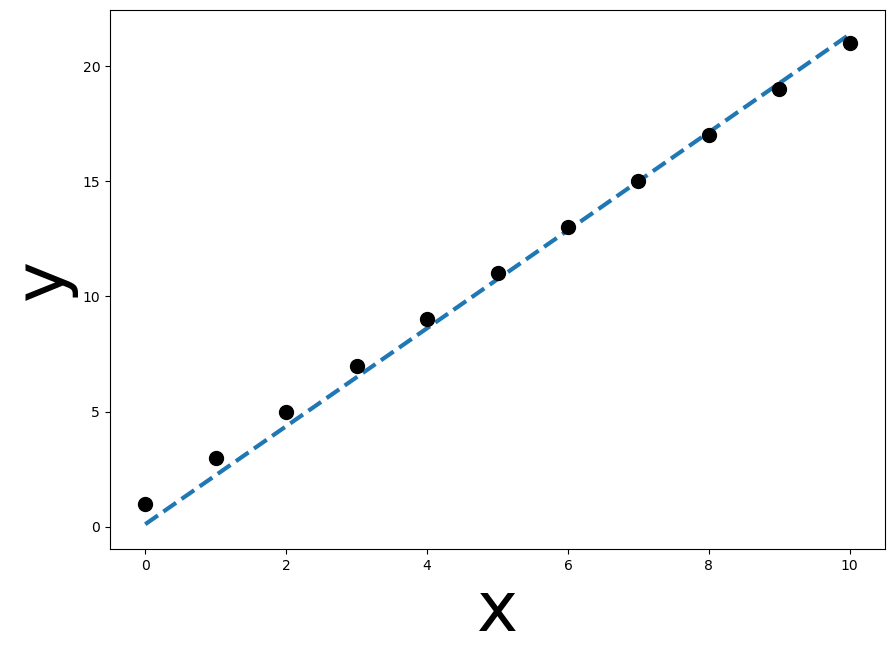

In [14]:
# Plot the predicted-y (blue line) vs expected targets (black dots)

plt.figure(figsize = (10, 7))

plt.plot(predicted, '--', linewidth = 3)
plt.plot(x_train, y_train, 'o', color = 'black', markersize = 10)
plt.xlabel('x', fontsize = 50)
plt.ylabel('y', fontsize = 50)

# <span style='color:red'> Part 3: Python Concepts for PyTorch ---------------------------------------------------------</span>

### 3.1 - Python Classes

In [14]:
class Pokemon():
    def __init__(self, Name, Type, Health): # Define attributes for the Pokemon object
        self.Name = Name
        self.Type = Type 
        self.Health = Health
        
    # Define methods for the Pokemon object
    
    def whats_your_name(self): # Your method can directly use the attributes defined in __init__
        print("My name is " + self.Name + "!")

    def attack(self):
        print("Electric attack! Zap!!")

    def dodge(self):
        print("Pikachu Dodge!")

    def evolve(self):
        print("Evolving to Raichu!!")

In [15]:
pk1 = Pokemon(Name = "Pikachu", Type = "Electric", Health = 70)

In [16]:
pk1.Name

'Pikachu'

In [17]:
pk1.whats_your_name()

My name is Pikachu!


In [18]:
pk1.attack()

Electric attack! Zap!!


### 3.2 - PyTorch Tensors vs Numpy Arrays

In [19]:
# Defining a numpy array
array1 = np.array([1,2,3,4]) 
print(array1, type(array1))

[1 2 3 4] <class 'numpy.ndarray'>


In [20]:
# Defining a torch tensor
tensor1 = torch.tensor([1,2,3,4])
print(tensor1, type(tensor1))

tensor([1, 2, 3, 4]) <class 'torch.Tensor'>


In [21]:
# Converting numpy array to torch tensor
array1_torch = torch.from_numpy(array1)
print(array1_torch, type(array1_torch))

tensor([1, 2, 3, 4]) <class 'torch.Tensor'>


In [22]:
# Converting torch tensor to numpy array
tensor1_numpy = tensor1.numpy()
print(tensor1_numpy, type(tensor1_numpy))

[1 2 3 4] <class 'numpy.ndarray'>


### 3.3 - Handling Torch Tensors

In [23]:
# Transferring your torch tensor to CPU
tensor1_cpu = tensor1.cpu()
print(tensor1_cpu.device)

cpu


In [24]:
# Transferring your torch tensor to GPU
tensor1_gpu = tensor1.cuda()
print(tensor1_gpu.device)

AssertionError: Torch not compiled with CUDA enabled